# Machine Learning Explainability

Kaggle course, March 2024

## Permutation Importance


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import graphviz

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [3]:
data = pd.read_csv("data/fifa_stats_2018.csv")
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [4]:
y = (data["Man of the Match"] == "Yes")

feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X             = data[feature_names]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

#my_model = RandomForestClassifier(n_estimators=100, random_state=0).fit(train_X, train_y)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)


In [5]:
explore_list = feature_names+["Man of the Match"]
explore_data = data[explore_list].copy()
del explore_list
explore_data.head()


,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Goals in PSO,Man of the Match
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,0,Yes
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,0,No
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,0,No
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,0,Yes
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,0,No


In [6]:
#import eli5
#from eli5.sklearn import PermutationImportance

#perm = PermutationImportance(my_model, random_state=1).fit(val_x, val_y)

#eli5.show_weights(perm, feature_name = val_X.columns.tolist())

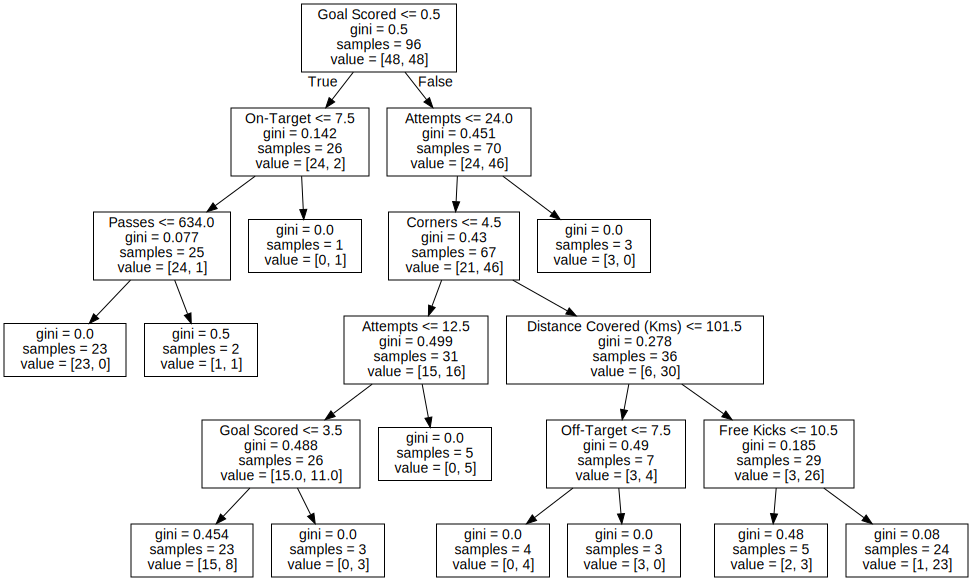

In [7]:
from sklearn import tree

tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)

graphviz.Source(tree_graph)

## Partial Plots

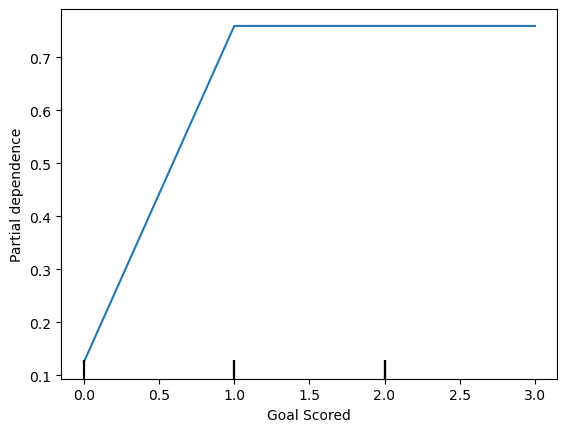

<Figure size 640x480 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

disp1 = PartialDependenceDisplay.from_estimator(tree_model,
                                                val_X,
                                                ['Goal Scored'])

plt.show()
plt.clf()

del disp1

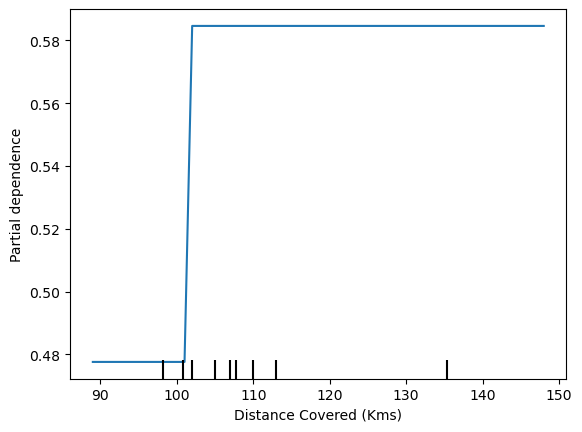

<Figure size 640x480 with 0 Axes>

In [9]:
feature_to_plot = 'Distance Covered (Kms)'

disp2 = PartialDependenceDisplay.from_estimator(tree_model,
                                                val_X,
                                                [feature_to_plot])

plt.show()
plt.clf()
del feature_to_plot, disp2 

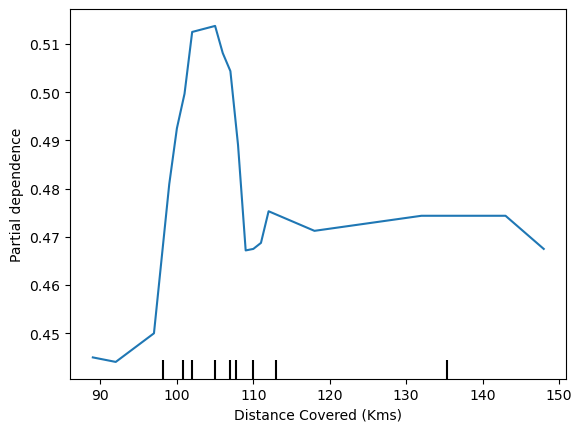

<Figure size 640x480 with 0 Axes>

In [10]:
rf_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

feature_to_plot = 'Distance Covered (Kms)'

disp3 = PartialDependenceDisplay.from_estimator(rf_model,
                                                val_X,
                                                [feature_to_plot])

plt.show()
plt.clf()
del feature_to_plot, disp3

<Figure size 640x480 with 0 Axes>

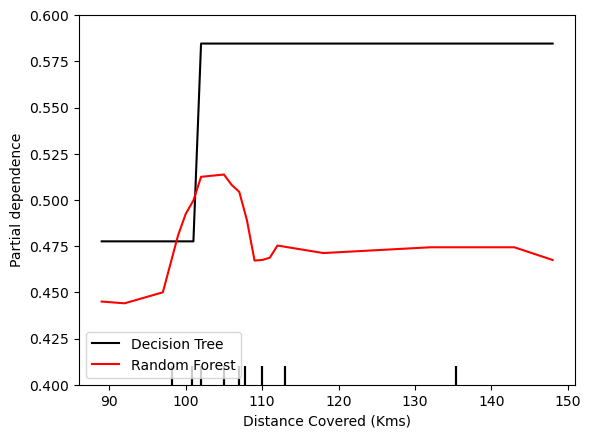

<Figure size 640x480 with 0 Axes>

In [11]:
feature_to_plot = 'Distance Covered (Kms)'

fig = plt.figure()
    
dispDT= PartialDependenceDisplay.from_estimator(tree_model,
                                            val_X,
                                            [feature_to_plot],
                                            line_kw={"label":"Decision Tree", "color":"black"})
dispRF = PartialDependenceDisplay.from_estimator(rf_model,
                                            val_X,
                                            [feature_to_plot],
                                            ax=dispDT.axes_, line_kw={"label":"Random Forest", "color":"red"})
plt.ylim(0.40, .60)
plt.show()
plt.clf()

del dispDT, dispRF, feature_to_plot

<Figure size 640x480 with 0 Axes>

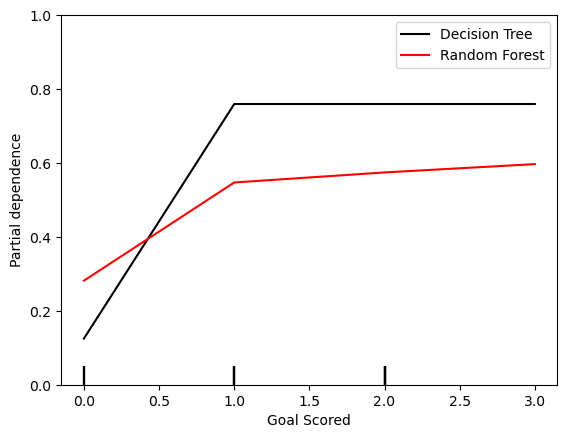

/home/rty10/miniconda3/envs/dnalab/lib/python3.10/site-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

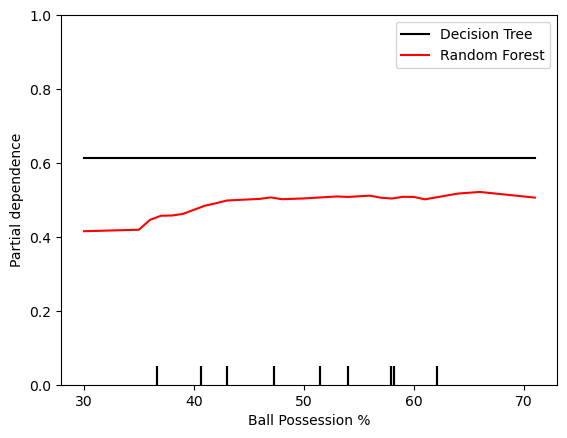

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

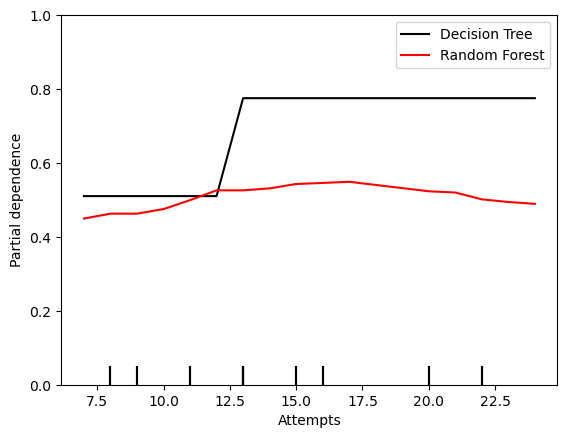

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

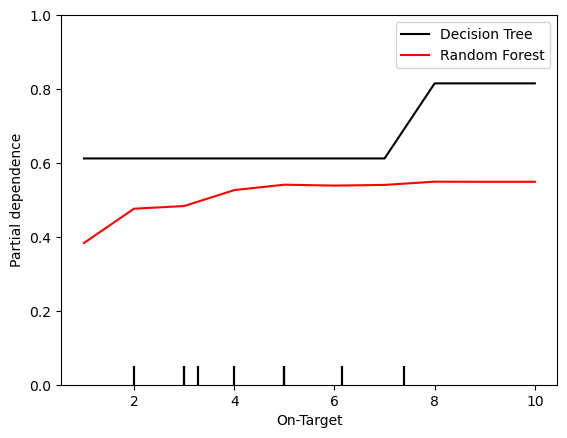

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

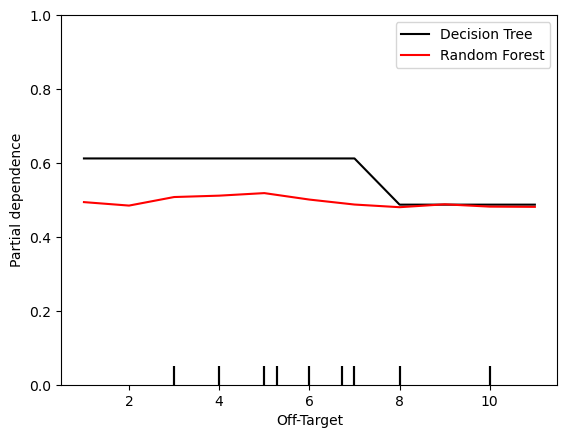

/home/rty10/miniconda3/envs/dnalab/lib/python3.10/site-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

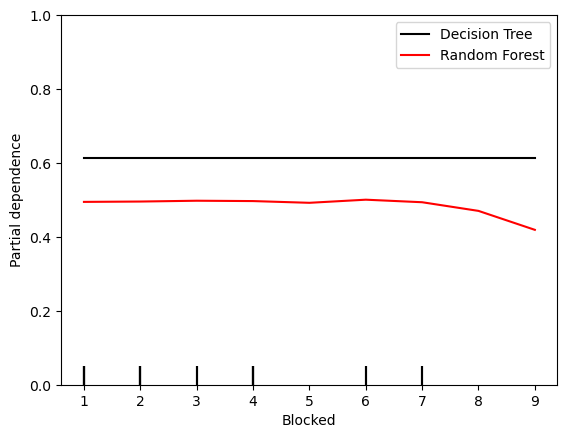

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

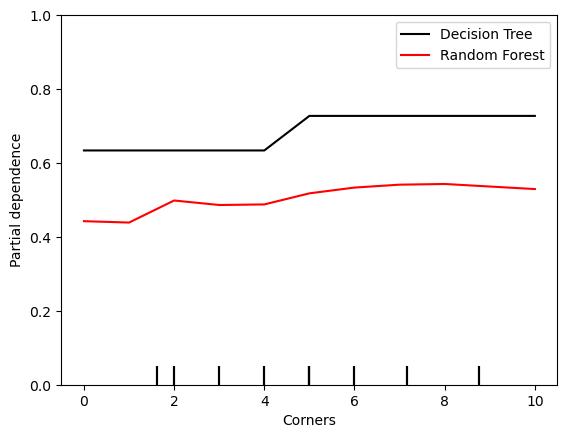

/home/rty10/miniconda3/envs/dnalab/lib/python3.10/site-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

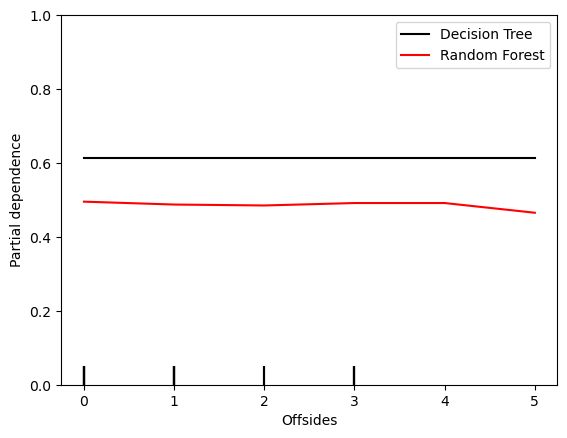

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

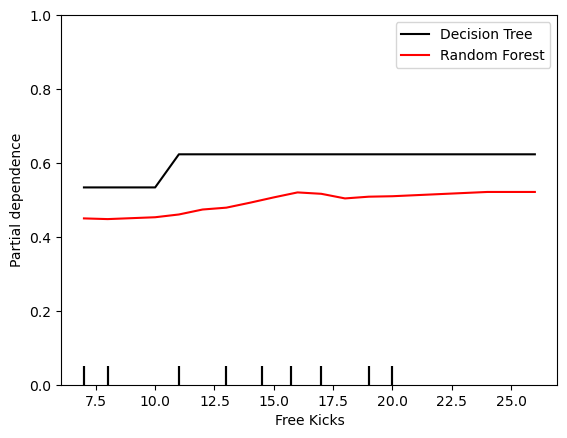

/home/rty10/miniconda3/envs/dnalab/lib/python3.10/site-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

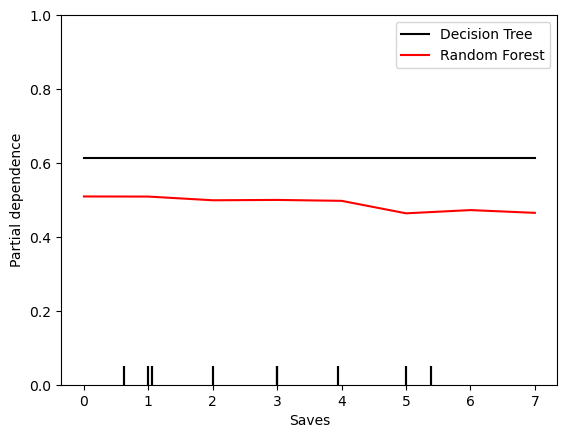

/home/rty10/miniconda3/envs/dnalab/lib/python3.10/site-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

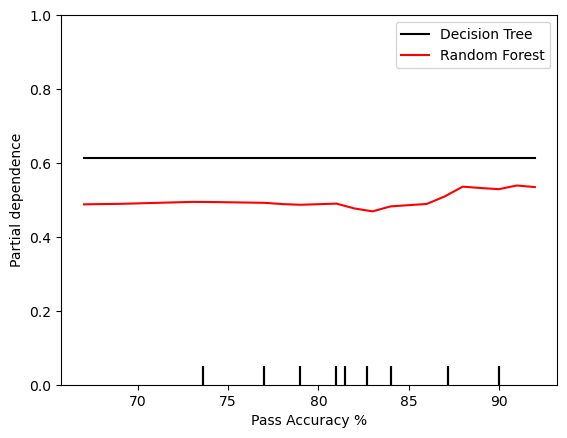

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

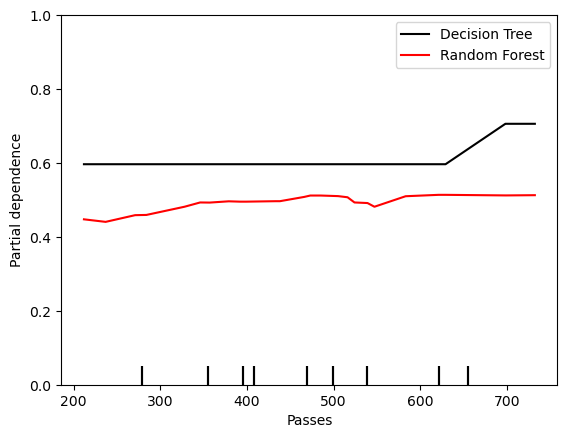

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

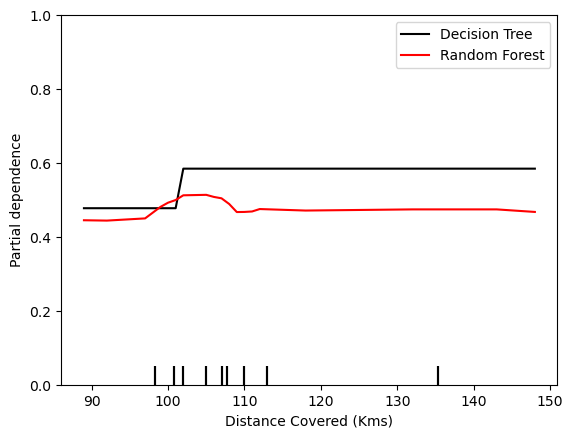

/home/rty10/miniconda3/envs/dnalab/lib/python3.10/site-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

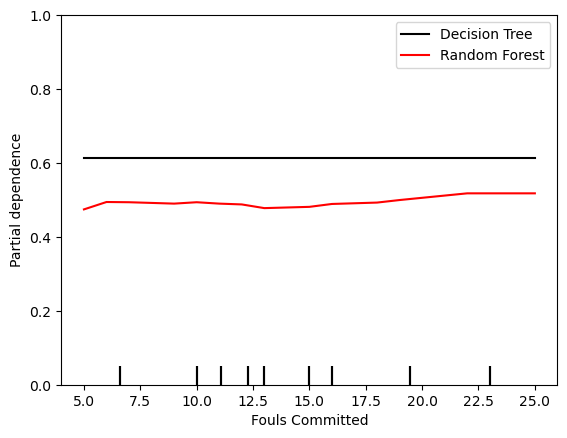

/home/rty10/miniconda3/envs/dnalab/lib/python3.10/site-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

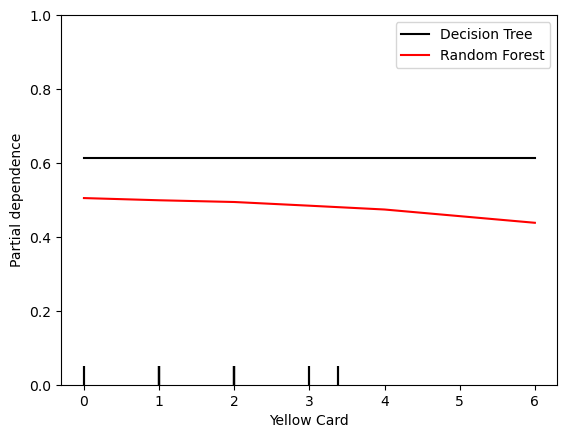

/home/rty10/miniconda3/envs/dnalab/lib/python3.10/site-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

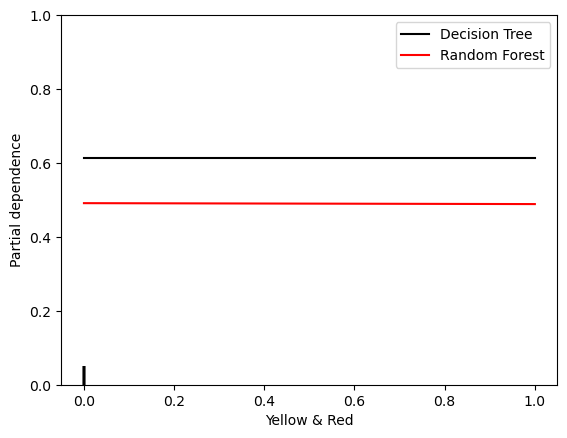

/home/rty10/miniconda3/envs/dnalab/lib/python3.10/site-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])
/home/rty10/miniconda3/envs/dnalab/lib/python3.10/site-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

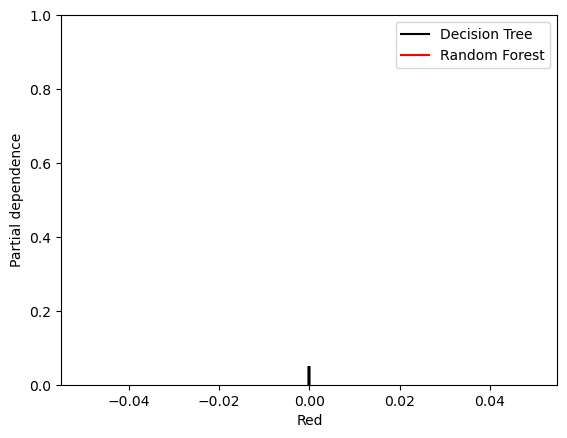

/home/rty10/miniconda3/envs/dnalab/lib/python3.10/site-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

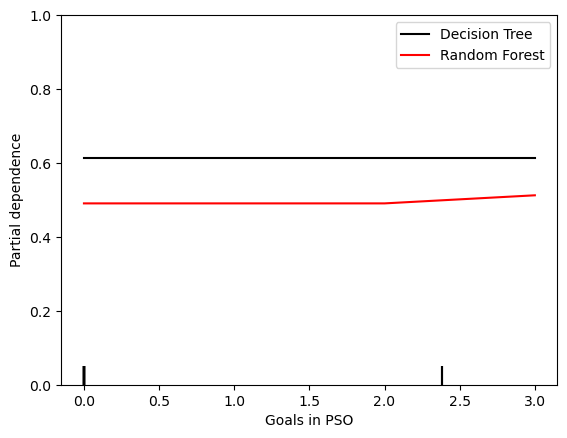

<Figure size 640x480 with 0 Axes>

In [12]:
for FEATURE in feature_names:
    fig = plt.figure()
    
    dispDT= PartialDependenceDisplay.from_estimator(tree_model,
                                                val_X,
                                                [FEATURE],
                                                line_kw={"label":"Decision Tree", "color":"black"})
    dispRF = PartialDependenceDisplay.from_estimator(rf_model,
                                                val_X,
                                                [FEATURE],
                                                ax=dispDT.axes_, line_kw={"label":"Random Forest", "color":"red"})
    plt.ylim(0, 1)
    plt.show()
    plt.clf()
    del dispDT, dispRF

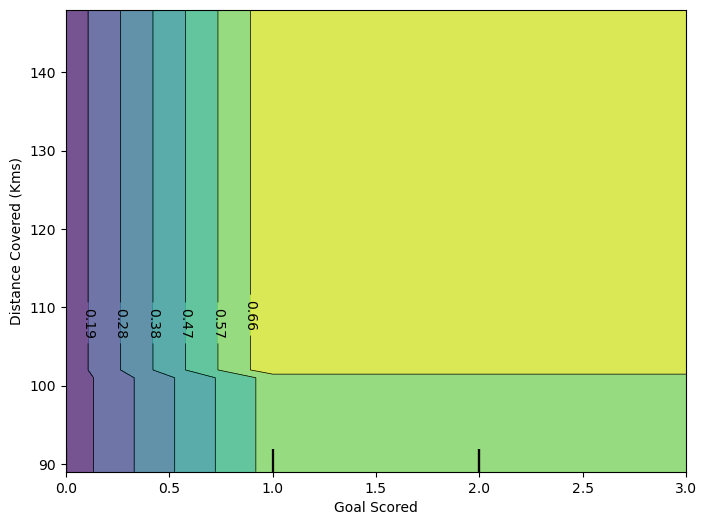

<Figure size 640x480 with 0 Axes>

In [13]:
fig, ax = plt.subplots(figsize=(8,6))

f_names = [('Goal Scored', 'Distance Covered (Kms)')]
disp4 = PartialDependenceDisplay.from_estimator(
    tree_model,
    val_X,
    f_names,
    ax=ax
)
plt.show()
plt.clf()

del f_names, disp4 

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

taxidata = pd.read_csv("data/train_taxi.csv", nrows=50000)
taxidata = taxidata.query(
    'pickup_latitude > 40.7 and pickup_latitude < 40.8 and ' 
    + 'dropoff_latitude > 40.7 and dropoff_latitude < 40.8 and ' 
    + 'pickup_longitude > -74 and pickup_longitude < -73.9 and ' 
    + 'dropoff_longitude > -74 and dropoff_longitude < -73.9 and ' 
    + 'fare_amount > 0'
    )

y = taxidata.fare_amount
base_features = ['pickup_longitude','pickup_latitude',
                 'dropoff_longitude','dropoff_latitude']
X = taxidata[base_features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
first_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(train_X, train_y)

print("Data sample:")
taxidata.head()

Data sample:


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1


In [15]:
taxidata.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,31289.000000,31289.000000,31289.000000,31289.000000,31289.000000,31289.000000
mean,8.483093,-73.976860,40.756917,-73.975342,40.757473,1.656141
std,4.628164,0.014635,0.018170,0.015917,0.018661,1.284899
min,0.010000,-73.999999,40.700013,-73.999999,40.700020,0.000000
25%,5.500000,-73.988039,40.744947,-73.987125,40.745922,1.000000
50%,7.500000,-73.979691,40.758027,-73.978547,40.758559,1.000000
75%,10.100000,-73.967823,40.769580,-73.966435,40.770427,2.000000
max,165.000000,-73.900062,40.799952,-73.900062,40.799999,6.000000


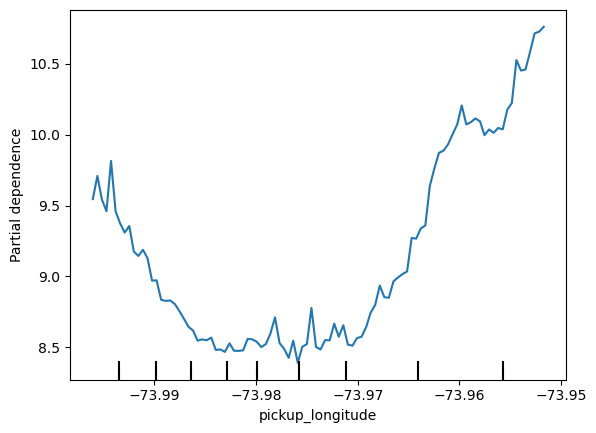

<Figure size 640x480 with 0 Axes>

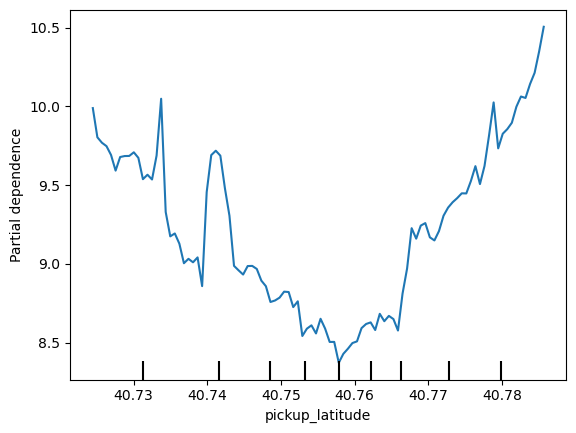

<Figure size 640x480 with 0 Axes>

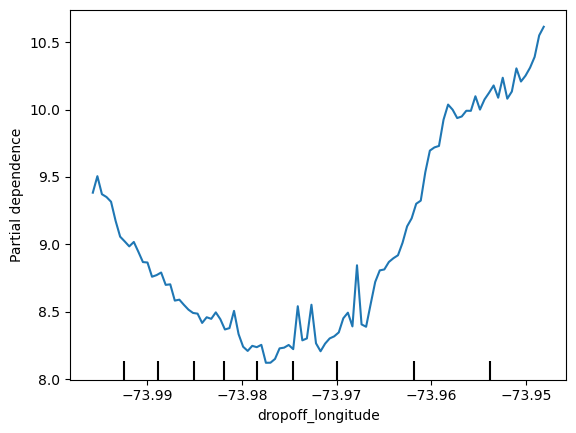

<Figure size 640x480 with 0 Axes>

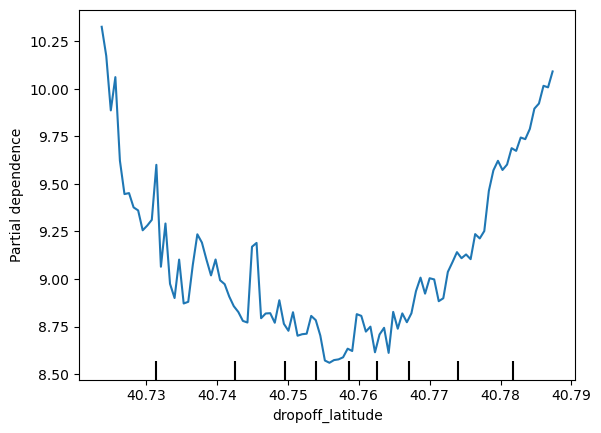

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

for feat_name in base_features:
    PartialDependenceDisplay.from_estimator(first_model, val_X, [feat_name])
    plt.show()
    plt.clf()


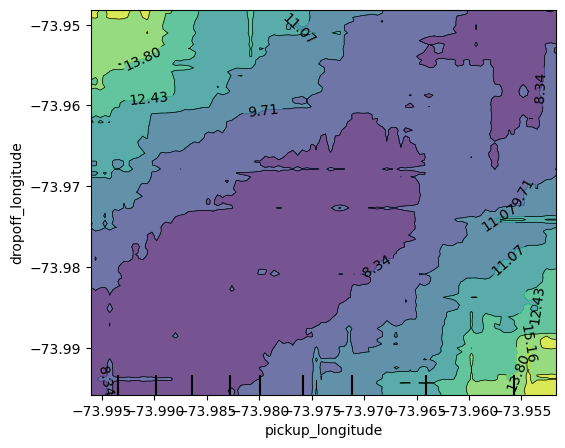

<Figure size 640x480 with 0 Axes>

In [17]:
fig, ax = plt.subplots(figsize=(6,5))
disp = PartialDependenceDisplay.from_estimator(first_model,
                                        val_X, 
                                        [('pickup_longitude','dropoff_longitude')],
                                        ax=ax)
#plt.colorbar(disp, ax=ax)
#plt.xlim(-73.950, -73.980)
#plt.ylim(-74.00, -73.975)
plt.show()
plt.clf()
del disp

In [18]:
# Generate second_model by include two new features that are absolute values of the lat and long changes

taxidata["abs_lon_change"] = abs(taxidata.pickup_longitude - taxidata.dropoff_longitude)
taxidata["abs_lat_change"] = abs(taxidata.pickup_latitude - taxidata.dropoff_latitude)

features_2 = ['pickup_longitude',
               'pickup_latitude',
               'dropoff_longitude',
               'dropoff_latitude',
               'abs_lat_change',
               'abs_lon_change']

X_2 = taxidata[features_2]
train_X2, val_X2, train_y2, val_y2 = train_test_split(X_2, y, random_state=1)

second_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(train_X2, train_y2)


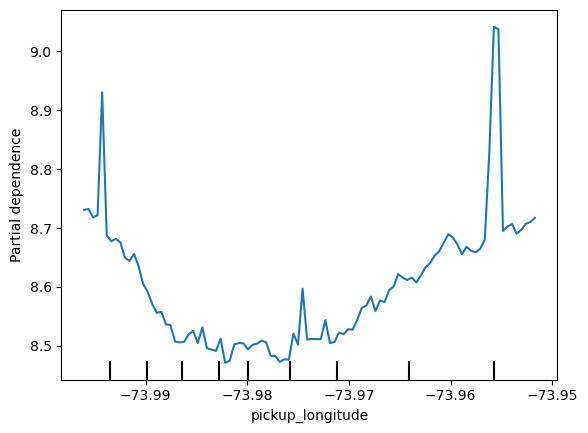

<Figure size 640x480 with 0 Axes>

In [19]:
disp = PartialDependenceDisplay.from_estimator(second_model,
                                               val_X2,
                                               ['pickup_longitude'])
plt.show()
plt.clf()
del disp

<Figure size 640x480 with 0 Axes>

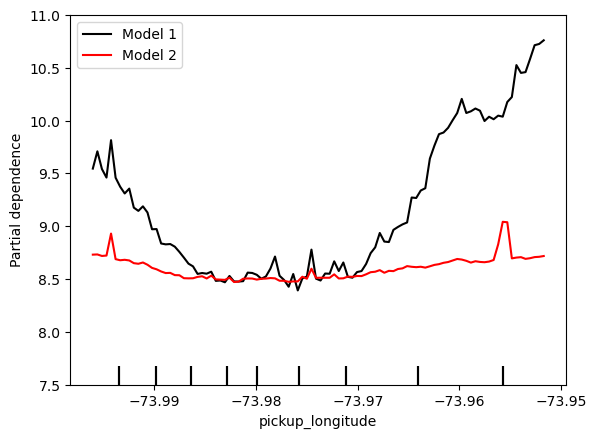

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

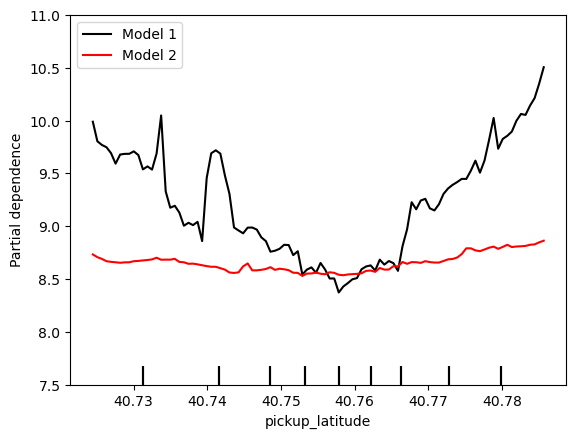

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

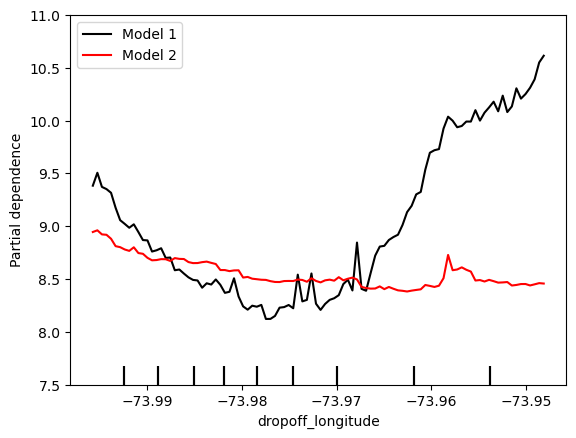

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

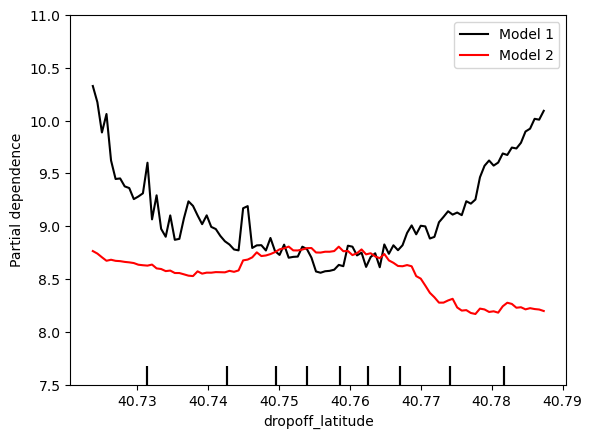

<Figure size 640x480 with 0 Axes>

In [20]:
for feat_name in base_features:
    fig = plt.figure()

    disp1 = PartialDependenceDisplay.from_estimator(first_model, 
                                                    val_X, 
                                                    [feat_name],
                                                    line_kw={"label":"Model 1", "color":"black"})
    disp2 = PartialDependenceDisplay.from_estimator(second_model, 
                                                    val_X, 
                                                    [feat_name],
                                                    line_kw={"label":"Model 2", "color":"red"},
                                                    ax=disp1.axes_)
    plt.ylim(7.5, 11)
    plt.show()
    plt.clf()
    del disp1, disp2
    

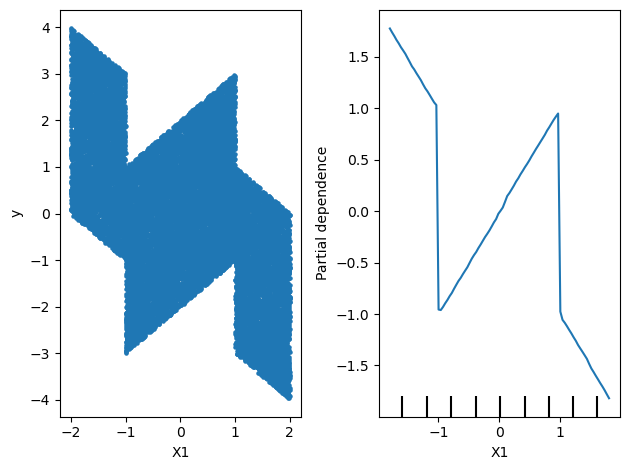

<Figure size 640x480 with 0 Axes>

In [21]:
import numpy as np
from numpy.random import rand

n_samples = 20000
X1 = 4*rand(n_samples) - 2
X2 = 4*rand(n_samples) - 2
#y = np.ones(n_samples)
#y = np.empty((0, n_samples))
#for i in range(n_samples):
#    if -1 <= X1[i] <= 1:
#        y=np.append(y, X1[i])
#    else:
#        y=np.append(y, X2[i])
y = -2*X1*(X1<-1) + X1 - 2*X1*(X1>1) - X2

my_df = pd.DataFrame({'X1':X1, 'X2':X2, 'y':y})
predictors_df = my_df.copy().drop(['y'], axis=1)
del X1, X2, y

my_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(predictors_df, my_df.y)

fig, (ax0, ax1) = plt.subplots(1, 2)

my_df.plot(x='X1', y='y', kind='scatter', marker='.', ax=ax0)
disp1 = PartialDependenceDisplay.from_estimator(my_model, predictors_df, ['X1'], ax=ax1)
plt.tight_layout()
plt.show()
plt.clf()
del my_model, disp1, n_samples


In [22]:
del my_df, predictors_df

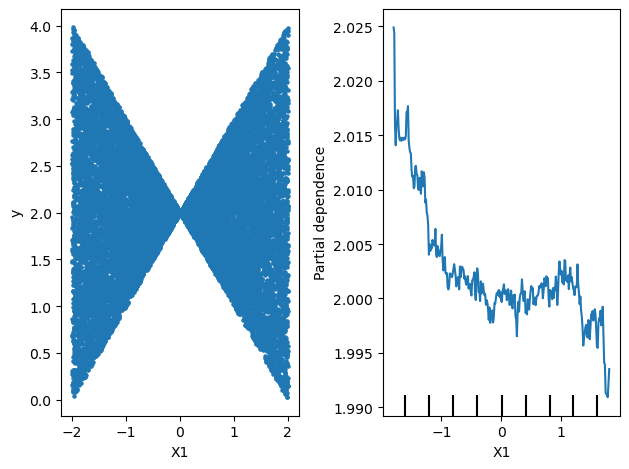

<Figure size 640x480 with 0 Axes>

In [23]:
# Create array holding predictive feature
n_samples = 20000
X1 = 4*rand(n_samples) - 2
X2 = 4*rand(n_samples) - 2
# Create y. you should have X1 and X2 in the expression for y
y = 2 + 0.5*X1*X2 


# create dataframe because pdp_isolate expects a dataFrame as an argument
my_df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})
predictors_df = my_df.drop(['y'], axis=1)

my_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(predictors_df, my_df.y)

fig, (ax0, ax1) = plt.subplots(1, 2)

my_df.plot(x='X1', y='y', kind='scatter', marker='.', ax=ax0)
disp1 = PartialDependenceDisplay.from_estimator(my_model, predictors_df, ['X1'], grid_resolution=300, ax=ax1)
plt.tight_layout()
plt.show()
plt.clf()
del my_model, disp1, n_samples


##  SHAP values


In [24]:
data = pd.read_csv('data/fifa_stats_2018.csv')

y = (data['Man of the Match'] =='Yes')

feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]
X = data[feature_names]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)


In [25]:
row_to_show = 5 # random single row of the data

data_for_pred = val_X.iloc[row_to_show]

data_for_pred_array = data_for_pred.values.reshape(1, -1)

my_model.predict_proba(data_for_pred_array)


/home/rty10/miniconda3/envs/dnalab/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.29, 0.71]])

In [30]:
data_for_pred

Goal Scored                 2
Ball Possession %          38
Attempts                   13
On-Target                   7
Off-Target                  4
Blocked                     2
Corners                     6
Offsides                    1
Free Kicks                 18
Saves                       1
Pass Accuracy %            69
Passes                    399
Distance Covered (Kms)    148
Fouls Committed            25
Yellow Card                 1
Yellow & Red                0
Red                         0
Goals in PSO                3
Name: 118, dtype: int64

In [27]:
import shap

explainer = shap.TreeExplainer(my_model)

shap_values = explainer.shap_values(data_for_pred)

shap_values

array([[-0.10282092,  0.10282092],
       [ 0.04740467, -0.04740467],
       [-0.02983219,  0.02983219],
       [-0.02277977,  0.02277977],
       [-0.00642731,  0.00642731],
       [-0.01258714,  0.01258714],
       [-0.02910577,  0.02910577],
       [ 0.00766886, -0.00766886],
       [-0.00792221,  0.00792221],
       [-0.01031725,  0.01031725],
       [ 0.00500036, -0.00500036],
       [ 0.00094579, -0.00094579],
       [ 0.02061101, -0.02061101],
       [-0.04846459,  0.04846459],
       [-0.00601652,  0.00601652],
       [-0.00042073,  0.00042073],
       [-0.0008261 ,  0.0008261 ],
       [-0.01286019,  0.01286019]])

In [29]:
explainer.expected_value[1]

0.5012500000000001

In [35]:
shap_values[:,1]

array([ 0.10282092, -0.04740467,  0.02983219,  0.02277977,  0.00642731,
        0.01258714,  0.02910577, -0.00766886,  0.00792221,  0.01031725,
       -0.00500036, -0.00094579, -0.02061101,  0.04846459,  0.00601652,
        0.00042073,  0.0008261 ,  0.01286019])

In [36]:
shap.initjs()

shap.force_plot(explainer.expected_value[1],
                shap_values[:,1],
                data_for_pred)


In [39]:
del explainer, shap_values

In [40]:
# Instead of TreeExplainer(), try KernalExplainer()

k_explainer = shap.KernelExplainer(my_model.predict_proba, train_X)

k_shap_values = k_explainer.shap_values(data_for_pred)

shap.force_plot(k_explainer.expected_value[1],
                k_shap_values[:,1],
                data_for_pred)


In [42]:
del k_explainer, k_shap_values

NameError: name 'k_explainer' is not defined

In [43]:
del data, X, y, feature_names
del train_X, val_X, train_y, val_y
del my_model
del data_for_pred, data_for_pred_array


In [44]:
## Working doc, kaggle.com SHAP exercise with medical "readmittance" data
## -----------------------------------------------------------------------

data = pd.read_csv("data/train_med.csv")

y = data.readmitted

base_features = [col for col in data.columns if col != 'readmitted']
X             = data[base_features]
del base_features

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

my_model = RandomForestClassifier(n_estimators=30,
                                  random_state=1).fit(train_X, train_y)


## TITLE